In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_99480/88469369.py:37: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  line1 = sns.lineplot(x='E_lab', y='CS', hue='isotope', data=sigr_dict[sigr][sigr_dict[sigr]['isotope'].isin(list(df10.columns[plot_from:plot_to]))], palette=colors, legend=None)
/tmp/ipykernel_99480/88469369.py:45: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  line2 = sns.lineplot(x='E_lab', y='CS', hue='isotope', data=sigr_dict[sigr][sigr_dict[sigr]['isotope'].isin(list(df10.columns[plot_from:plot_to]))], palette=colors, ls='-.', legend=None)
/tmp/ipykernel_99480/88469369.py:51: UserWarning: Legend does not support [] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(handles=[h1, h2], labels = new_labels)
No artists with labels found to put in legend.  Note that artists 

[]


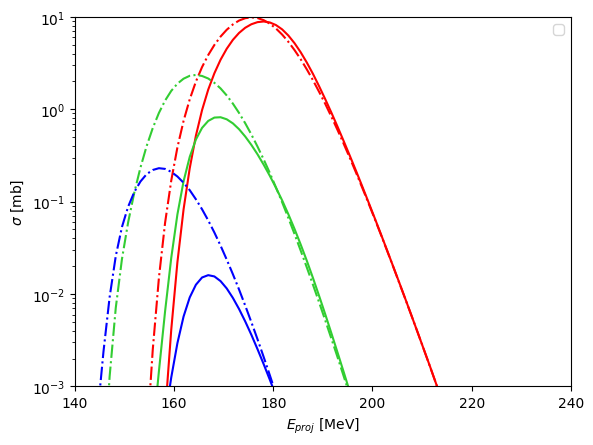

In [247]:
proj = '40Ar'
trg = '165Ho'
cn = '205At'
bf = 0.81
ch = 'xn'

sigr_dict = {}
# sigr_array = np.arange(2.5, 3.5, 0.2)
sigr_array = np.array([1.5, 5.0])
for sigr in sigr_array:
    sigr_value = str(f'{sigr:.1f}')
    sigr_string = 'sigr' + sigr_value
    
    df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + sigr_value + '.dat', sep='\t')
    
    dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
    dfm10 = dfm10_mb
    df10 = df10_mb
    
    mb = 1
    ub = 1e3
    nb = 1e6

    scale = mb
    dfm10['CS'] = dfm10_mb['CS']*scale
    sigr_dict[sigr_string] = dfm10   
    
    
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
plot_from = 5
plot_to = 8
labels = list(df10.columns[plot_from:plot_to])

for i in range(len(list(sigr_dict))):
    sigr = list(sigr_dict)[i]
    if i == 0:
        line1 = sns.lineplot(x='E_lab', y='CS', hue='isotope', data=sigr_dict[sigr][sigr_dict[sigr]['isotope'].isin(list(df10.columns[plot_from:plot_to]))], palette=colors, legend=None)
        new_labels = []
        for label in labels:
            new_labels.append(label + ' - ' + sigr)
        h1, l1, = line1.get_legend_handles_labels()
    elif i == 1:
        for label in labels:
            new_labels.append(label + ' - ' + sigr)
        line2 = sns.lineplot(x='E_lab', y='CS', hue='isotope', data=sigr_dict[sigr][sigr_dict[sigr]['isotope'].isin(list(df10.columns[plot_from:plot_to]))], palette=colors, ls='-.', legend=None)
        h2, l2, = line2.get_legend_handles_labels()
        

# plt.legend(handles=handles2, labels=labels)
print(h2)
plt.legend(handles=[h1, h2], labels = new_labels)
plt.semilogy()
plt.ylim(1e-3, 1e1)
plt.xlim(140, 240)
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')
    
plt.show()    